Linear Regression, Poly Regression, Multi variant Regression
using Python - First Data Creation 

#Again Page Loads vs Purchase Value 

%matplotlib inline

import numpy as np
from pylab import *


pageSpeeds = np.random.normal (3.0, 1.0, 1000)
# we need a negative correlation so 100 - 
purchaseAmount  = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000))*3

scatter(pageSpeeds, purchaseAmount)

In [5]:
#Now to the linear regresssion 

from scipy import stats
slope, intercept, r_value, p_value, std_err= stats.linregress(pageSpeeds, purchaseAmount)



In [7]:
#print Rsquared

print(r_value**2)

0.989788069506


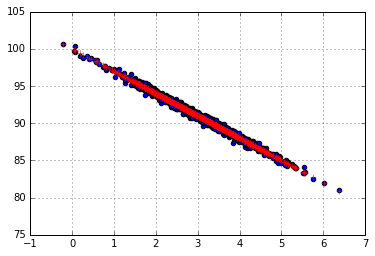

In [13]:
#Plotting predicted Value to Observed
import matplotlib.pyplot as plt
axes = plt.axes()
axes.grid()


def predictYfromX(x):
    return slope*x + intercept

Y = predictYfromX(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, Y, 'r+')
plt.show()

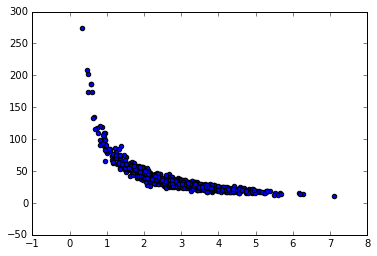

In [17]:
#Lets do polynomial Regression 

#First a non linear data set 
# see you dont do + here just a division 

%matplotlib inline 

from pylab import * 
np.random.seed(2)

pageSpeed = np.random.normal(3.0, 1.0, 1000)
purchaseAmt = np.random.normal (90, 10.0, 1000)/pageSpeed
scatter(pageSpeed, purchaseAmt)


In [26]:
#convert to arrays
x = np.array(pageSpeed)
y = np.array(purchaseAmt)

#use the polyfit function 
p4 = np.poly1d(np.polyfit(x,y,4))
print(p4)

        4         3        2
0.9141 x - 15.05 x + 89.3 x - 233.5 x + 258.5


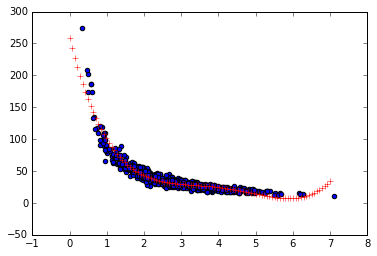

In [27]:
# now lets plot 

import matplotlib.pyplot as plt

#fetch 100 samples between 0-7 seconds
xp = np.linspace(0,7,100)

plt.scatter(x,y)
plt.plot(xp, p4(xp), "r+")
plt.show()


#That was awesome Now lets do some multivariant regresssion`

In [37]:
#Use Pandas now to create data
import pandas as pd

#create a data frame
df = pd.read_excel('file:///C://Ravi//work/trainings//Machine%20Learning%20with%20Python//cars.xls')
df.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [42]:
# now lets use Statsmodels to slice and dice

import statsmodels.api as sm

df['Model_ord'] = pd.Categorical(df.Model).codes
print(df.head())


          Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  Model_ord  
0      4       1      1        1         10  
1      4       1      1        0         10  
2      4       1      1        0         10  
3      4       1      0        0         10  
4      4       1      0        1         10  


In [55]:
#Lets define X & Y ordinal 

X = df[['Mileage','Model_ord','Doors']]
Y = df[['Price']]


X1 = sm.add_constant(X)
est = sm.OLS(Y, X1).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Sat, 15 Oct 2016   Prob (F-statistic):           1.98e-07
Time:                        18:25:12   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000      2.77e+04  3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000        -0.259    -0.095
Model_ord    -39.0387     39.326     -0.993      0.321      -116.234    38.157
Doors      -1652.9303    402.649     -4.105      0.000     -2443.303  -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# trying to do this example with another data set 